In [4]:
'''
File name: gen_syn.py
Author: Janessa Reed
Created: 2/26/2024
Version: 1.0

License: MIT License 
'''

import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker
fake = Faker()

# Set random seed for reproducibility
np.random.seed(42)

# Number of synthetic patients
num_samples = 1000

# Generate patient data
data = {
    "Patient_ID": [fake.uuid4()[:8] for _ in range(num_samples)],  # Random unique IDs
    "Age": np.random.randint(30, 80, num_samples),  # Age 30-80
    "Gender": np.random.choice([0, 1], num_samples),  # 0 = Female, 1 = Male
    "Systolic_BP": np.random.randint(100, 180, num_samples),  # BP range 100-180
    "Diastolic_BP": np.random.randint(60, 120, num_samples),  # BP range 60-120
    "Cholesterol": np.random.randint(150, 300, num_samples),  # Cholesterol levels 150-300
    "Glucose_Level": np.random.randint(70, 200, num_samples),  # Glucose levels 70-200
    "Heart_Rate": np.random.randint(50, 120, num_samples),  # Heart rate 50-120
    "Smoking_Status": np.random.choice([0, 1], num_samples),  # 0 = Non-Smoker, 1 = Smoker
    "BMI": np.round(np.random.uniform(18.5, 40, num_samples), 1),  # BMI between 18.5 and 40
    "Family_History": np.random.choice([0, 1], num_samples, p=[0.7, 0.3]),  # 30% have family history
    "Exercise_Hours_Per_Week": np.random.randint(0, 10, num_samples),  # Weekly exercise
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define the target variable (Heart Disease presence)
df["Heart_Disease"] = (
    (df["Age"] > 55) & (df["Cholesterol"] > 240) & (df["Smoking_Status"] == 1)
).astype(int)  # Simple risk-based model

# Save dataset to CSV
df.to_csv("synthetic_heart_disease_human_readable.csv", index=False)

# Display first few rows
print(df.head())




  Patient_ID  Age  Gender  Systolic_BP  Diastolic_BP  Cholesterol  \
0   1f20f34d   68       0          152           104          264   
1   2d406b65   58       0          129            95          296   
2   ac5e3596   44       0          138            89          197   
3   c5ac2025   72       1          130           114          257   
4   ae28bd22   37       0          101           108          201   

   Glucose_Level  Heart_Rate  Smoking_Status   BMI  Family_History  \
0             98         102               0  18.7               1   
1            128         108               1  35.8               0   
2            140          88               0  20.2               0   
3            161          64               1  27.4               0   
4             78          78               0  33.1               0   

   Exercise_Hours_Per_Week  Heart_Disease  
0                        4              0  
1                        0              1  
2                        2      

In [5]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns (ID is not a feature)
X = df.drop(columns=["Patient_ID", "Heart_Disease"])  # Features
y = df["Heart_Disease"]  # Target variable

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check dataset shape
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (800, 11) (800,)
Testing set: (200, 11) (200,)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       181
           1       0.69      0.47      0.56        19

    accuracy                           0.93       200
   macro avg       0.82      0.73      0.76       200
weighted avg       0.92      0.93      0.92       200



C:\Users\reedj\OneDrive\Desktop\AI_Governance\AI_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


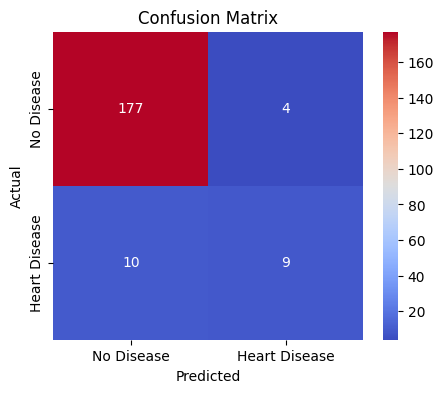

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


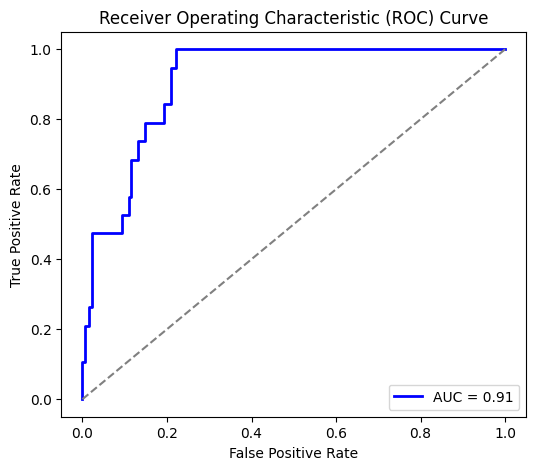

In [8]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("\nRandom Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Model Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      0.95      0.97        19

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.99       200
weighted avg       1.00      0.99      0.99       200



In [10]:
import numpy as np
from sklearn.metrics import classification_report

# Filter test data by gender
male_idx = X_test["Gender"] == 1
female_idx = X_test["Gender"] == 0

# Model predictions for males & females
y_pred_male = model.predict(X_test[male_idx])
y_pred_female = model.predict(X_test[female_idx])

# True labels
y_test_male = y_test[male_idx]
y_test_female = y_test[female_idx]

# Print classification report for each gender
print("📊 Model Performance for Males:\n", classification_report(y_test_male, y_pred_male))
print("\n📊 Model Performance for Females:\n", classification_report(y_test_female, y_pred_female))


📊 Model Performance for Males:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96        84
           1       0.57      0.50      0.53         8

    accuracy                           0.92        92
   macro avg       0.76      0.73      0.75        92
weighted avg       0.92      0.92      0.92        92


📊 Model Performance for Females:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        97
           1       0.83      0.45      0.59        11

    accuracy                           0.94       108
   macro avg       0.89      0.72      0.78       108
weighted avg       0.93      0.94      0.93       108



In [11]:
import pandas as pd

# Extract feature importance
feature_importance = pd.DataFrame({"Feature": X_train.columns, 
                                   "Importance": np.abs(model.coef_[0])})
# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Display top features
print("🔍 Top Features Influencing Predictions:\n", feature_importance)


🔍 Top Features Influencing Predictions:
                     Feature  Importance
7            Smoking_Status    2.998028
1                    Gender    0.125900
9            Family_History    0.106473
8                       BMI    0.087826
10  Exercise_Hours_Per_Week    0.079084
0                       Age    0.062368
3              Diastolic_BP    0.030236
6                Heart_Rate    0.028371
2               Systolic_BP    0.027117
4               Cholesterol    0.024400
5             Glucose_Level    0.013471


In [12]:
# Extract feature importance from Random Forest
rf_importance = pd.DataFrame({"Feature": X_train.columns, 
                              "Importance": rf_model.feature_importances_})
rf_importance = rf_importance.sort_values(by="Importance", ascending=False)

print("🌲 Random Forest - Top Features:\n", rf_importance)


🌲 Random Forest - Top Features:
                     Feature  Importance
4               Cholesterol    0.313114
0                       Age    0.265548
7            Smoking_Status    0.219245
5             Glucose_Level    0.043103
2               Systolic_BP    0.035439
3              Diastolic_BP    0.034553
8                       BMI    0.031402
6                Heart_Rate    0.027698
10  Exercise_Hours_Per_Week    0.021772
1                    Gender    0.004626
9            Family_History    0.003499


In [13]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract False Positives & False Negatives
false_positives = cm[0][1]
false_negatives = cm[1][0]

print(f"⚠️ False Positives: {false_positives}")
print(f"⚠️ False Negatives: {false_negatives}")


⚠️ False Positives: 4
⚠️ False Negatives: 10
